# Decision problem for different subpopulations

## Brief description

The bank also collects some personal data about their applicants, such as their gender. We will assume a binary gender collection where g=0 represents women and g=1 represents men. The bank now wants to test which effect different decision rules have on the loan approval rate of women and men.

## Questions

All questions require a dataset. This dataset is saved in the same folder as this notebook. You can access it with `pandas.read_csv()`.

**(a)	Assume a threshold rule of p > 0.7, so only those with a repayment probability of above 0.7 receive a loan. What share of women receives a loan? What share of men receives a loan?**

In [1]:
import pandas as pd

Let us first import the dataset. For this, you can click on the folder icon on the left and then select the icon to upload a dataset. Upload the dataset 'loan_applicants.csv', so that your Google Colab Notebook has access to it.

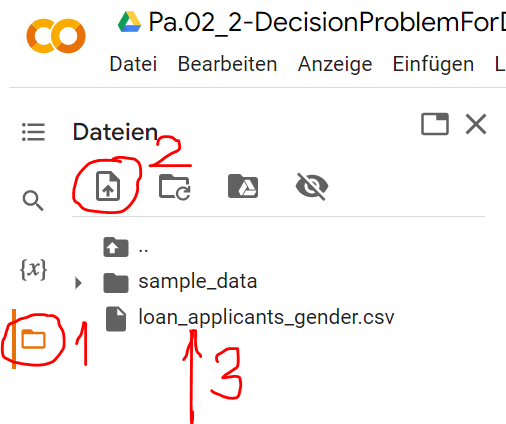

Then use pandas to read the csv file.

In [2]:
loan_applicants = pd.read_csv('loan_applicants_gender.csv')
loan_applicants

,p,g
0,0.343231,0
1,0.730046,0
2,0.526888,0
3,0.454292,0
4,0.213089,0
...,...,...
19995,0.710064,1
19996,0.748065,1
19997,0.812917,1
19998,0.448689,1


Now it's time to add your own code.

In [14]:
def get_share_gender_specific(p):
    loan_applications_over_threshold = loan_applicants[loan_applicants['p'] > p]
    return len(loan_applications_over_threshold[loan_applications_over_threshold['g'] == 1]) / len(loan_applicants[loan_applicants['g'] == 1]), len(loan_applications_over_threshold[loan_applications_over_threshold['g'] == 0]) / len(loan_applicants[loan_applicants['g'] == 0])
res = get_share_gender_specific(0.7)
print(res[0] * 100, 'percent or', 
      res[0] * len(loan_applicants[loan_applicants['g'] == 1]),
      'out of', 
      len(loan_applicants[loan_applicants['g'] == 1]), 
      'Men and', 
      res[1] * 100, 
      'percent or', 
      res[1] * len(loan_applicants[loan_applicants['g'] == 0]), 
      'out of', 
      len(loan_applicants[loan_applicants['g'] == 0]), 
      'Woman')

14.84 percent or 1484.0 out of 10000 Men and 6.65 percent or 665.0 out of 10000 Woman


**(b) Assume a threshold rule of p > 0.8. What share of women receives a loan? What share of men receives a loan?**

In [15]:
def get_share_gender_specific(p):
    loan_applications_over_threshold = loan_applicants[loan_applicants['p'] > p]
    return len(loan_applications_over_threshold[loan_applications_over_threshold['g'] == 1]) / len(loan_applicants[loan_applicants['g'] == 1]), len(loan_applications_over_threshold[loan_applications_over_threshold['g'] == 0]) / len(loan_applicants[loan_applicants['g'] == 0])
res = get_share_gender_specific(0.8)
print(res[0] * 100, 'percent or', 
      res[0] * len(loan_applicants[loan_applicants['g'] == 1]),
      'out of', 
      len(loan_applicants[loan_applicants['g'] == 1]), 
      'Men and', 
      res[1] * 100, 
      'percent or', 
      res[1] * len(loan_applicants[loan_applicants['g'] == 0]), 
      'out of', 
      len(loan_applicants[loan_applicants['g'] == 0]), 
      'Woman')

5.9799999999999995 percent or 598.0 out of 10000 Men and 1.92 percent or 191.99999999999997 out of 10000 Woman


**(c) In both (a) and (b), there is a difference of the acceptance rates of men vs. women. What is the cause of this difference in acceptance rate?**

It is crucial what criteria, regardless of gender, are used to decide whether someone gets a loan or not.

Possible deciding criteria:
* **1**: income
* **2**: workload
* **3**: gender based bias

So why are women less likely to receive credit?
* **Cause 1**: Women tend to have a lower income
* **Cause 2**: Women are more often in part-time jobs (childcare)
* **Cause 3**: Because of gender based bias in banking (male dominated sector or historical bias)

**(d) Generalize your insight: Under which circumstances would the share of accepted applicants be identical if the bank applied the same rule p > p_0 for an arbitrary p_0?**

Three possibility:
* $𝑝_0=0$ (everyone accepted)
* different $𝑝_0$ for women and men
* optimization of decision criterias (trained features) 

**(e) Assume again a threshold rule of p > 0.7. With respect to fairness, one might argue that a difference in acceptance rates is not a problem, for example if one has reason to believe that women are more financially responsible than men and only apply if they have a high probability of repaying their loan. In such a case, a higher acceptance rate of women would be natural. One could then restrict the analysis to those individuals who actually repay their loan. Of course, this is not known at the time of decision making. However, if the true probability is known as we assume here, we still can do the evaluation. One could argue that the decision rule is fair if women who do repay their loan have the same acceptance rate as men who do pay back. 
Use the provided data set and calculate: What share of the women who actually repay their loan is accepted? What share of men who would be able to repay their loan actually receives a loan?**

**(Hint: for each individual, the repayment probability is given.  For each individual i, you can define a random variable Y_i which is Y_i=1 for a repaying individual, and Y_i=0 else. The expectation value of Y_i is a number between 0 and 1. The expected number of repaying customers is the sum over all these individual expectation values.)**

In [17]:
import numpy as np
loan_applicants['Y'] = np.random.choice([0,1], size=len(loan_applicants))

In [43]:
def calc_share_of_gender(threshold, g, Y):
    loan_applicants_over_threshold = loan_applicants[loan_applicants['p'] > threshold]
    y_1 = loan_applicants.loc[(loan_applicants['g'] == g) & (loan_applicants['Y'] == Y), 'g'].count()
    y_1_accepted = loan_applicants_over_threshold.loc[(loan_applicants_over_threshold['g'] == g) 
                                                    & (loan_applicants_over_threshold['Y'] == Y), 'g'].count()
    return y_1_accepted, np.round(y_1_accepted / y_1 * 100, 2), y_1
    

In [46]:
res = calc_share_of_gender(.7, 0, 1)
print(res[0], 'or', res[1], 'percent Woman out of', res[2], 'who actually repay are accepted')

304 or 6.25 percent Woman out of 4863 who actually repay are accepted


In [45]:
res = calc_share_of_gender(.7, 1, 1)
print(res[0], 'or', res[1], 'percent Men out of', res[2], 'who actually repay are accepted')

747 or 14.91 percent Men out of 5009 who actually repay are accepted


**(f) Assume again a threshold rule of p > 0.8. What share of women who would be able to repay their loan actually receives a loan? What share of men who would be able to repay their loan actually receives a loan?**

In [47]:
res = calc_share_of_gender(.8, 0, 1)
print(res[0], 'or', res[1], 'percent Woman out of', res[2], 'who actually repay are accepted')
res = calc_share_of_gender(.8, 1, 1)
print(res[0], 'or', res[1], 'percent Men out of', res[2], 'who actually repay are accepted')

89 or 1.83 percent Woman out of 4863 who actually repay are accepted
294 or 5.87 percent Men out of 5009 who actually repay are accepted
